In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("../data/refined/german.csv")

In [3]:
df.head()

,status_of_existing_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account_bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors_guarantors,...,property,age_in_years,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,creditability
0,< 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,>= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,Good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,< 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,Good
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad


# Codifiy Qualitative Features

## Ordinal Features

In [4]:
# Define the mappings for ordinal variables
ordinal_mappings = {
    "status_of_existing_checking_account": {
        "< 0 DM": 1,
        "0 <= ... < 200 DM": 2,
        ">= 200 DM / salary assignments for at least 1 year": 3,
        "no checking account": 4,
    },
    "savings_account_bonds": {
        "< 100 DM": 1,
        "100 <= ... < 500 DM": 2,
        "500 <= ... < 1000 DM": 3,
        ">= 1000 DM": 4,
        "unknown/ no savings account": 5,
    },
    "present_employment_since": {
        "unemployed": 1,
        "< 1 year": 2,
        "1 <= ... < 4 years": 3,
        "4 <= ... < 7 years": 4,
        ">= 7 years": 5,
    },
}

# Replace the ordinal values
df = df.replace(ordinal_mappings)

/tmp/ipykernel_35265/2923900224.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(ordinal_mappings)


# Categorical Features

In [11]:
cat_mappings = {
    'credit_history': {
        'no credits taken/ all credits paid back duly': 'A30',
        'all credits at this bank paid back duly': 'A31',
        'existing credits paid back duly till now': 'A32',
        'delay in paying off in the past': 'A33',
        'critical account/ other credits existing (not at this bank)': 'A34'
    },
    'purpose': {
        'car (new)': 'A40',
        'car (used)': 'A41',
        'furniture/equipment': 'A42',
        'radio/television': 'A43',
        'domestic appliances': 'A44',
        'repairs': 'A45',
        'education': 'A46',
        '(vacation - does not exist?)': 'A47',
        'retraining': 'A48',
        'business': 'A49',
        'others': 'A410'
    },
    'personal_status_and_sex': {
        'male : divorced/separated': 'A91',
        'female : divorced/separated/married': 'A92',
        'male : single': 'A93',
        'male : married/widowed': 'A94',
        'female : single': 'A95'
    },
    'other_debtors_guarantors': {
        'none': 'A101',
        'co-applicant': 'A102',
        'guarantor': 'A103'
    },
    'property': {
        'real estate': 'A121',
        'building society savings agreement/ life insurance': 'A122',
        'car or other, not in attribute 6': 'A123',
        'unknown / no property': 'A124'
    },
    'other_installment_plans': {
        'bank': 'A141',
        'stores': 'A142',
        'none': 'A143'
    },
    'housing': {
        'rent': 'A151',
        'own': 'A152',
        'for free': 'A153'
    },
    'job': {
        'unemployed/ unskilled - non-resident': 'A171',
        'unskilled - resident': 'A172',
        'skilled employee / official': 'A173',
        'management/ self-employed/ highly qualified employee/ officer': 'A174'
    },
    'telephone': {
        'none': 'A191',
        'yes, registered under the customers name': 'A192'
    },
    'foreign_worker': {
        'yes': 'A201',
        'no': 'A202'
    },
    'creditability': {
        'Good': 1,
        'Bad': 2
    }
}

# save categorical columns in a list

cat_cols_list = [col for col in cat_mappings.keys()]

In [10]:
df = df.replace(cat_mappings)

/tmp/ipykernel_35265/809223495.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(cat_mappings)


In [13]:
df = pd.get_dummies(df, columns=cat_cols_list, drop_first=True)

In [14]:
df

,status_of_existing_checking_account,duration_in_month,credit_amount,savings_account_bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,present_residence_since,age_in_years,number_of_existing_credits_at_this_bank,number_of_people_being_liable_to_provide_maintenance_for,...,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202,creditability_2
0,1,6,1169,5,5,4,4,67,2,1,...,False,True,True,False,False,True,False,True,False,False
1,2,48,5951,1,3,2,2,22,1,1,...,False,True,True,False,False,True,False,False,False,True
2,4,12,2096,1,4,2,3,49,1,2,...,False,True,True,False,True,False,False,False,False,False
3,1,42,7882,1,4,2,4,45,1,2,...,False,True,False,True,False,True,False,False,False,False
4,1,24,4870,1,3,3,4,53,2,2,...,False,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,1736,1,4,3,4,31,1,1,...,False,True,True,False,True,False,False,False,False,False
996,1,30,3857,1,3,4,4,40,1,1,...,False,True,True,False,False,False,True,True,False,False
997,4,12,804,1,5,4,4,38,1,1,...,False,True,True,False,False,True,False,False,False,False
998,1,45,1845,1,3,4,4,23,1,1,...,False,True,False,True,False,True,False,True,False,True


---

In [15]:
# get correlation matrix

corr = df.corr()

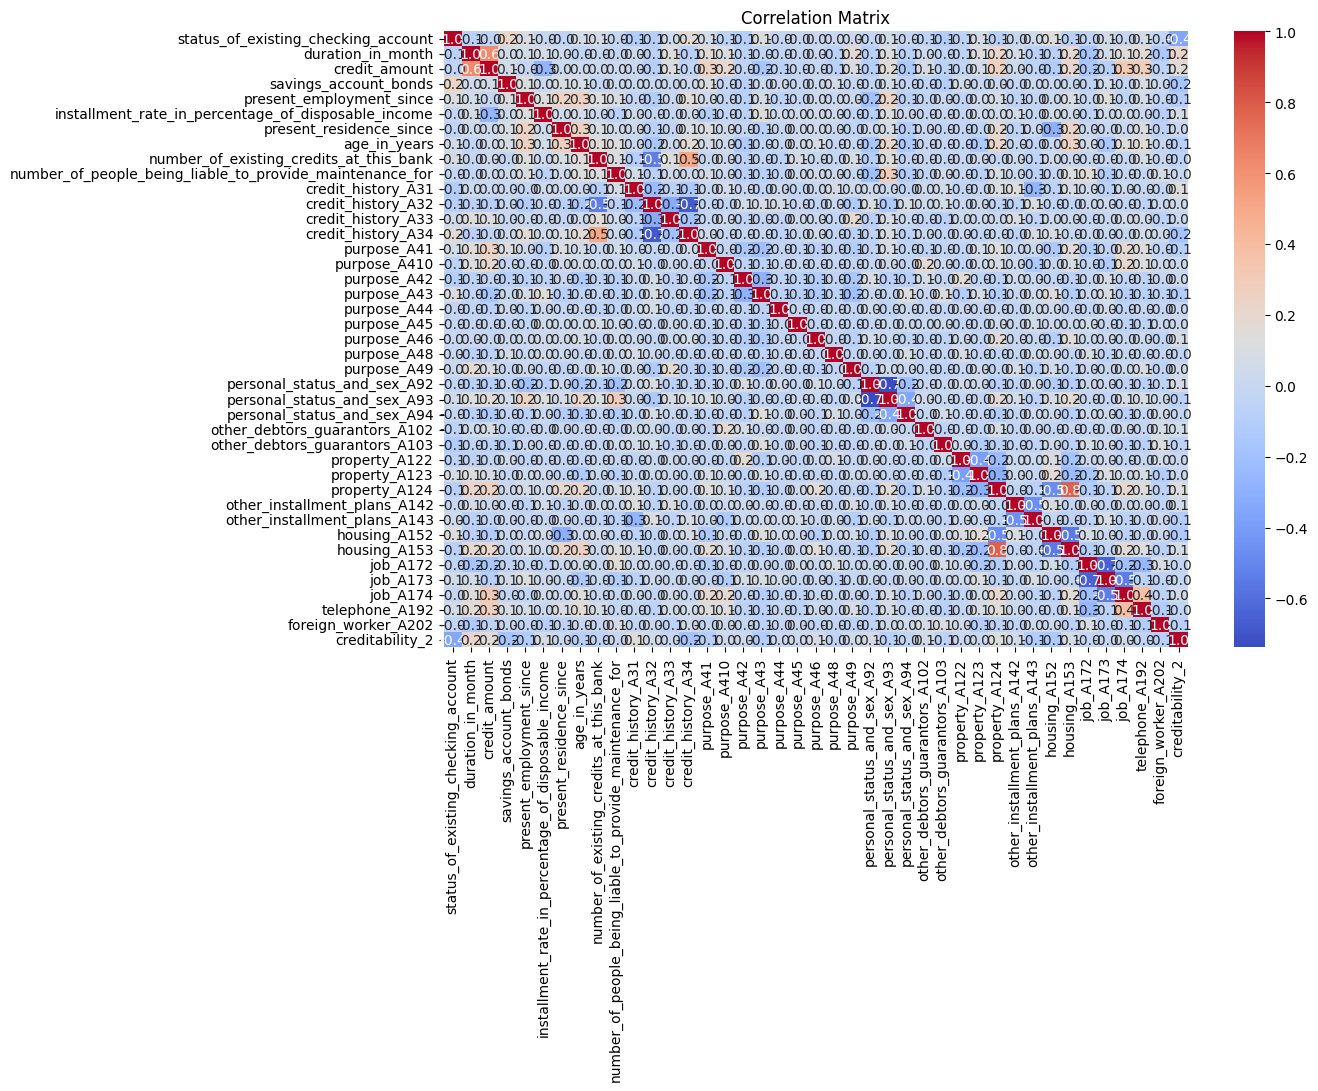

In [19]:
# Correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

In [25]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# # Drop features 
# df.drop(to_drop, axis=1, inplace=True)

In [26]:
to_drop

['credit_amount',
 'credit_history_A32',
 'credit_history_A34',
 'personal_status_and_sex_A93',
 'housing_A153',
 'job_A173',
 'job_A174']